In [1]:
import os
import json
import tqdm
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

from collections import defaultdict

In [2]:
def extract_log(dataset, model, task_id):
    target_dir = os.path.join("log", dataset)
    file_names = os.listdir(target_dir)
    case_dict = defaultdict(dict)
    for fname in file_names:
        fname_decomp = fname.split('-')
        ftask_id = fname_decomp[0]
        fmodel, ftype = fname_decomp[-1].split('.')
        select_flag = (ftask_id == task_id) and (fmodel == model)
        if not select_flag:
#             print("file {} skiped".format(fname))
            continue
        data_key = dataset + ftask_id + fmodel +''.join(fname_decomp[1:-1])
        if ftype == "meta":
            with open(os.path.join(target_dir, fname), mode='rt') as f:
                case_dict[data_key]['meta'] = json.load(f)
        if ftype == "log":
            df = pd.read_csv(os.path.join(target_dir, fname))
            df.columns = [c.strip() for c in df.columns]
            case_dict[data_key]['log'] = df
    return case_dict

In [3]:
def plot_along_epoch(case_dict, 
                     col_of_interests=["val_acc", "test_acc"], 
                     key_var='v',
                     key_var_name='v', 
                     key_var_filter=lambda x: True, 
                     case_meta_filter=lambda x: True, 
                     ax=plt):
    plot_order = []
    selected_case_keys = sorted([k for k in case_dict.keys() 
                                 if case_meta_filter(case_dict[k]['meta']) and key_var_filter(case_dict[k]['meta'][key_var])],
                               key=lambda x: case_dict[x]['meta'][key_var])
    for k in selected_case_keys:
        case = case_dict[k]
        cols = case['log'][col_of_interests]
        for c in col_of_interests:
            x = np.arange(len(cols[c]))
            ax.plot(x, cols[c], label="{} = {}".format(key_var_name, case['meta'][key_var]))
    ax.legend()

In [4]:
def get_stats_df(case_dict):
    df = None
    for k, case in case_dict.items():
        record_dict = {"key": k}
        record_dict.update(case['meta'])
        if df is None:
            df = pd.DataFrame(columns=list(record_dict.keys()))
        df = df.append(record_dict, ignore_index=True)
    return df

# CIFAR 10

In [5]:
case_dict_cifar10 = extract_log("CIFAR10", "ResNet18", "forpub")
sdf_cifar10 = get_stats_df(case_dict_cifar10)
sdf_cifar10

key  dataset     model task_id cuda  \
0    CIFAR10forpubResNet182001161648035d9c  CIFAR10  ResNet18  forpub    2   
1    CIFAR10forpubResNet18200116163131ebd3  CIFAR10  ResNet18  forpub    3   
2    CIFAR10forpubResNet182001150120466852  CIFAR10  ResNet18  forpub    3   
3    CIFAR10forpubResNet182001162233205d63  CIFAR10  ResNet18  forpub    0   
4    CIFAR10forpubResNet182001151907587513  CIFAR10  ResNet18  forpub    1   
..                                     ...      ...       ...     ...  ...   
135  CIFAR10forpubResNet182001160047398819  CIFAR10  ResNet18  forpub    0   
136  CIFAR10forpubResNet1820011618174317ce  CIFAR10  ResNet18  forpub    2   
137  CIFAR10forpubResNet1820011509095532c6  CIFAR10  ResNet18  forpub    0   
138  CIFAR10forpubResNet182001150608095794  CIFAR10  ResNet18  forpub    3   
139  CIFAR10forpubResNet18200115040731acbc  CIFAR10  ResNet18  forpub    1   

         lr     v   alpha  auto weight_decay batch_size num_epochs  \
0    0.0001  1.00 -0.5000  True            0        128        100   
1    0.0001  2.00 -0.5000  True            0        128        100   
2    0.0001  2.00  0.9900  True            0        128        100   
3    0.0001  0.25  0.9999  True            0        128        100   
4    0.0001  0.50  0.5000  True            0        128        100   
..      ...   ...     ...   ...          ...        ...        ...   
135  0.0001  0.25  1.0000  True            0        128        100   
136  0.0001  1.00 -1.0000  True            0        128        100   
137  0.0001  0.25 -0.5000  True            0        128        100   
138  0.0001  2.00  0.0000  True            0        128        100   
139  0.0001  0.50  0.5000  True            0        128        100   

     noise_ratio  
0            0.6  
1            0.6  
2            0.0  
3            0.8  
4            0.2  
..           ...  
135          0.4  
136          0.6  
137          0.0  
138          0.0  
139          0.0  

[140 rows x 13 columns]

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


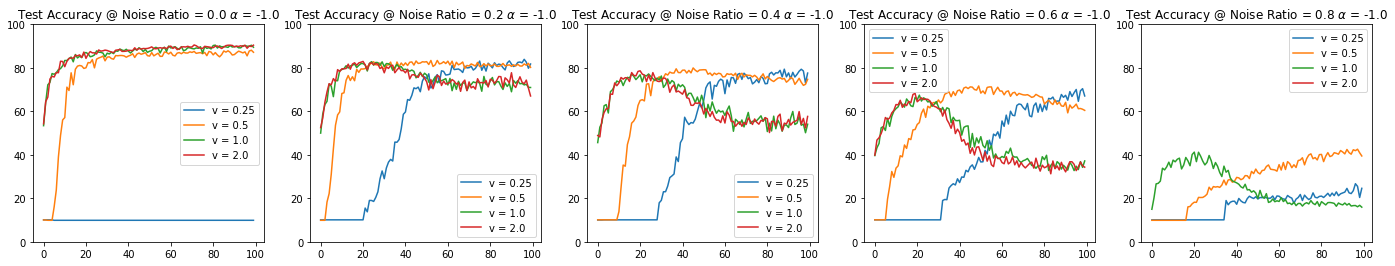

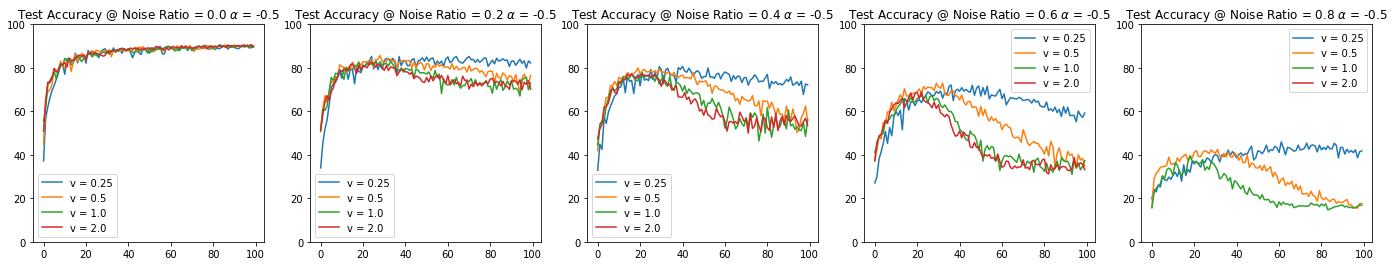

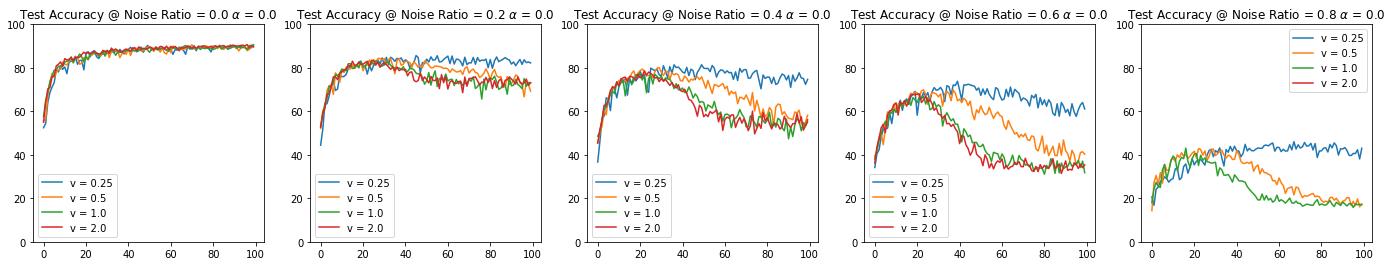

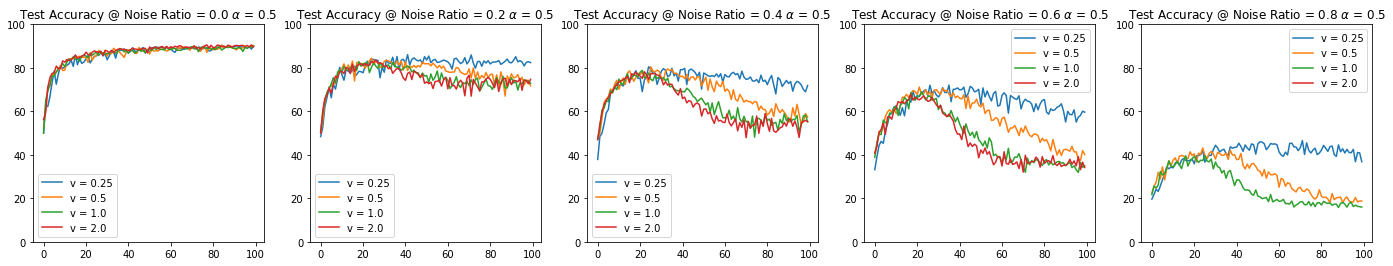

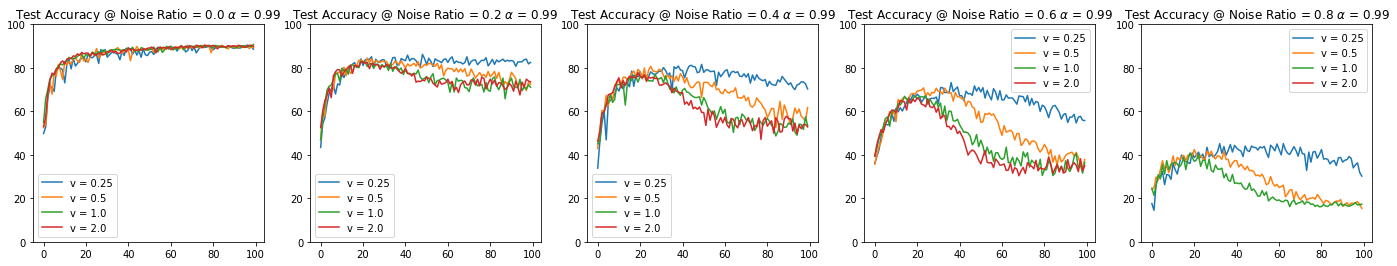

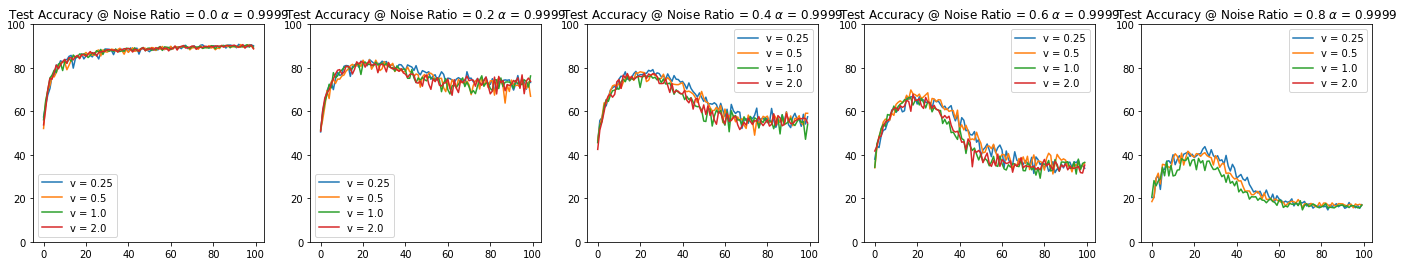

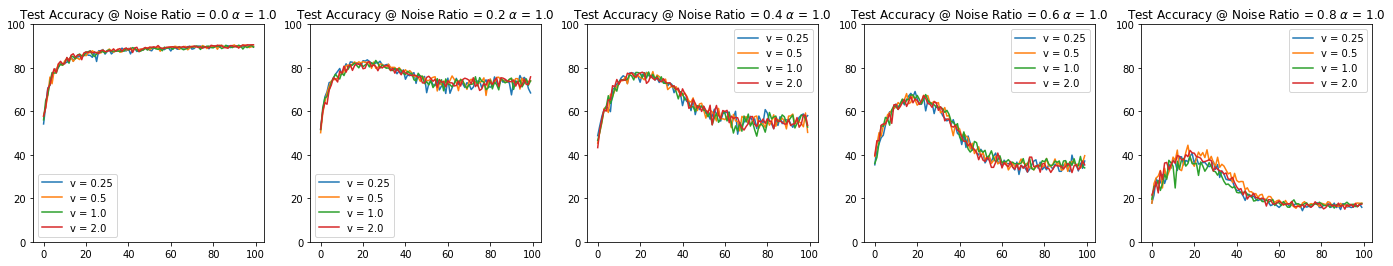

In [6]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_cifar10['alpha'].unique()))
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['test_acc'], case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'Test Accuracy @ Noise Ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([0, 100])
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


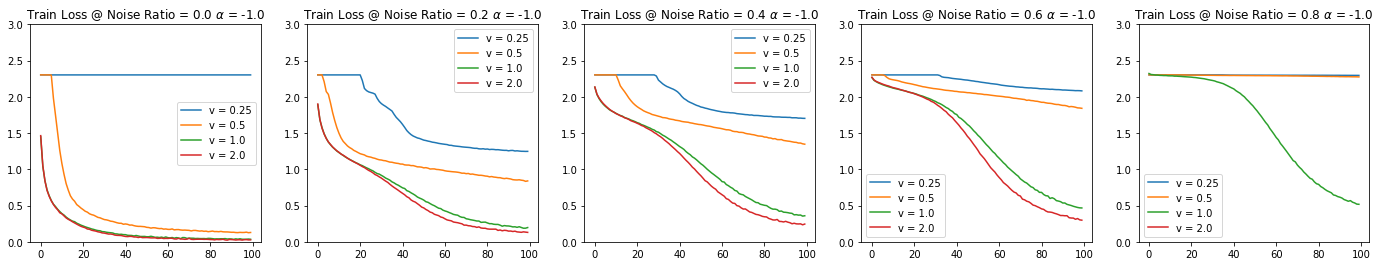

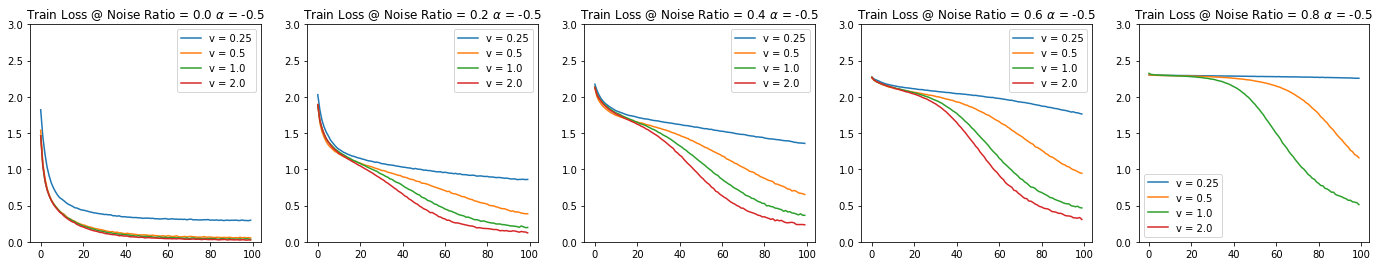

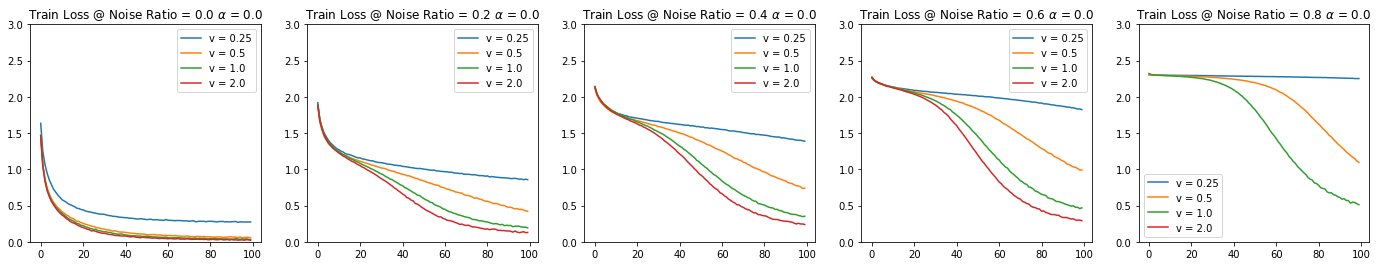

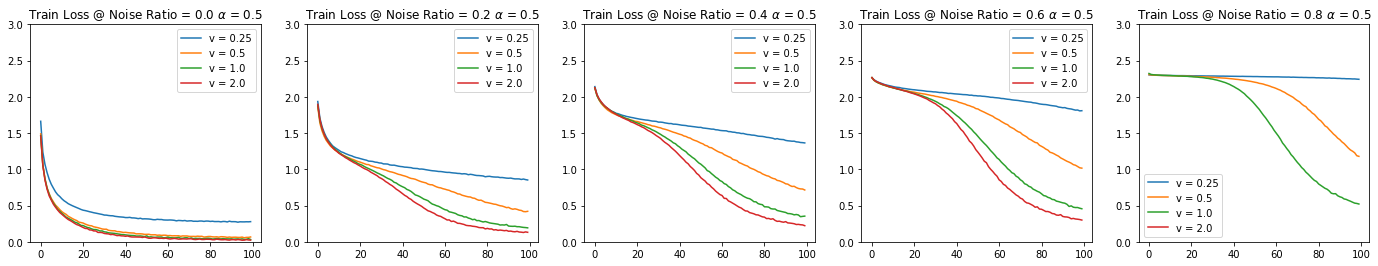

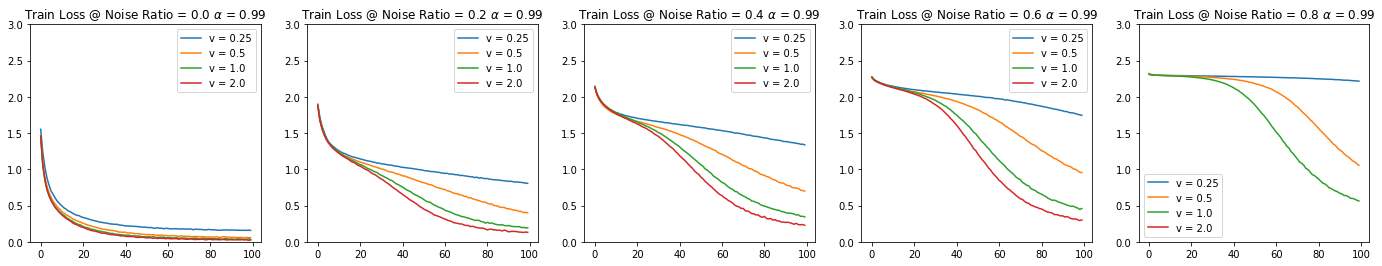

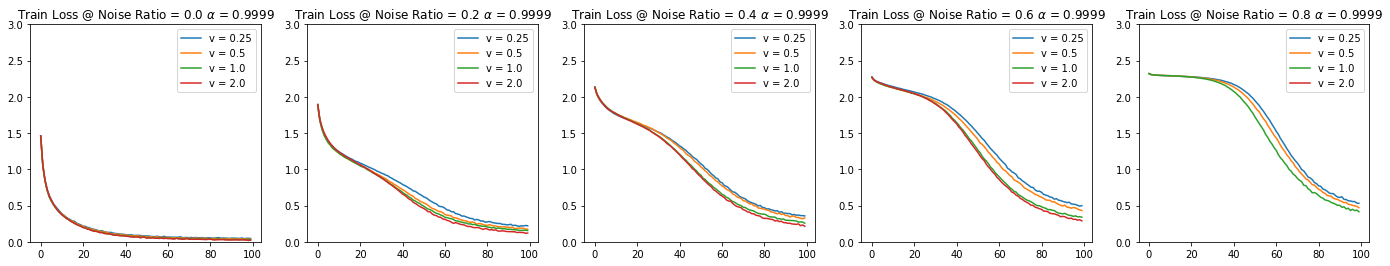

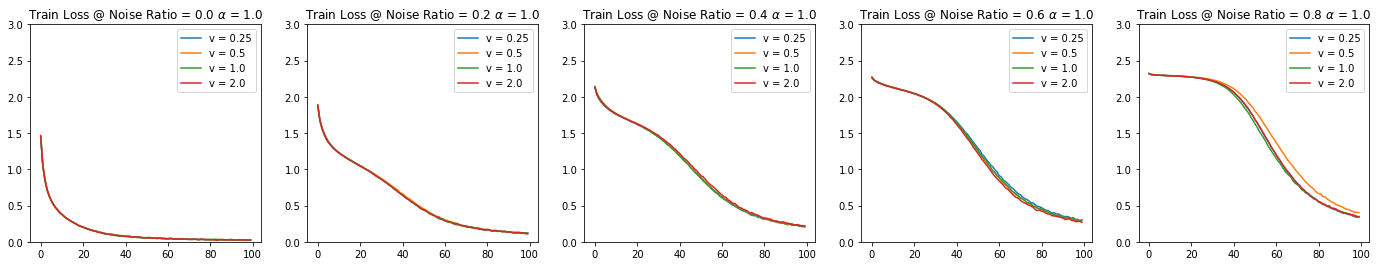

In [7]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_cifar10['alpha'].unique()))
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['train_loss'], case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'Train Loss @ Noise Ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([0, 3])
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


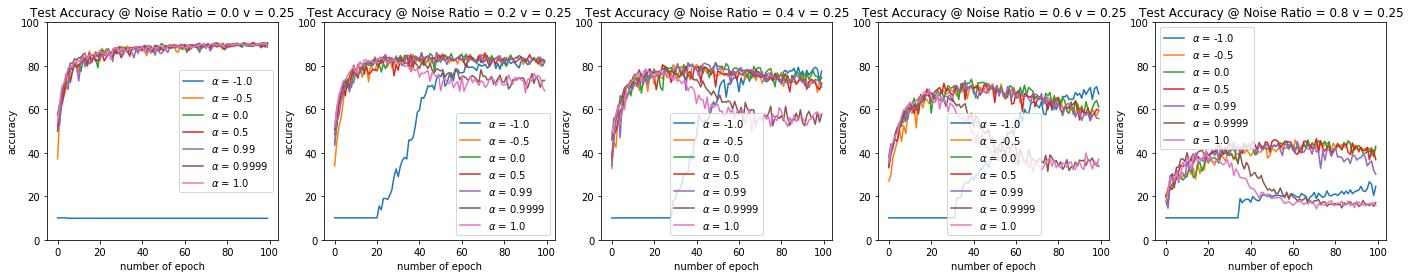

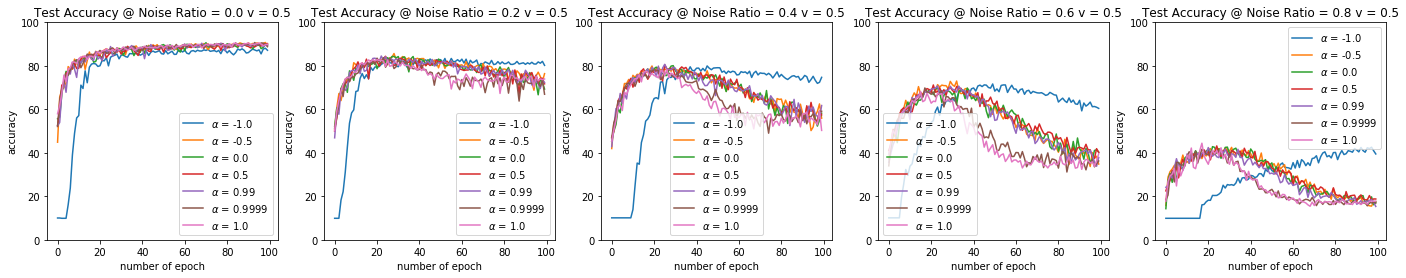

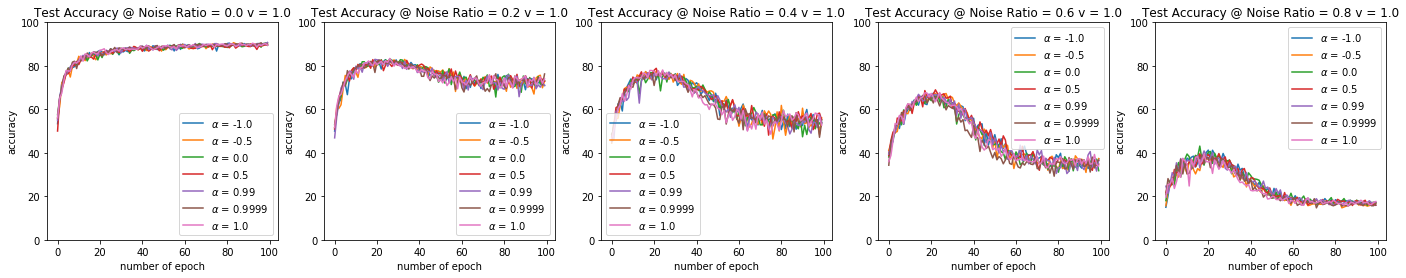

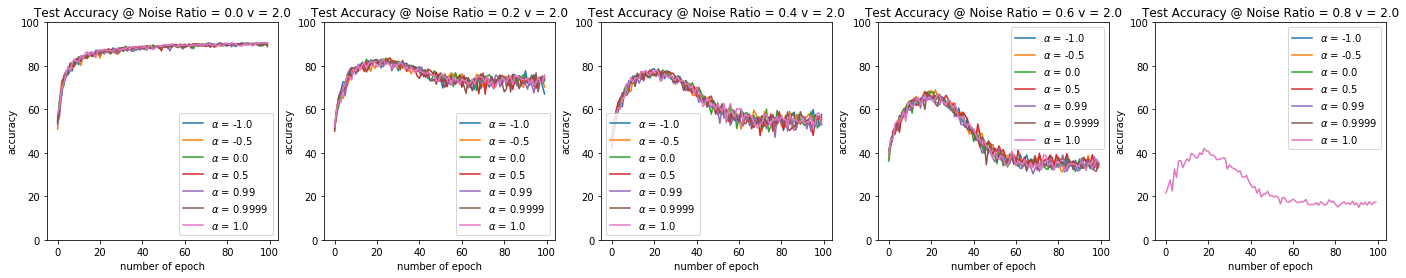

In [25]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
v_list = sorted(list(sdf_cifar10['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['test_acc'], key_var='alpha', key_var_name=r'$\alpha$', case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('Test Accuracy @ Noise Ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([0, 100])
        ax[i].set_xlabel('number of epoch')
        ax[i].set_ylabel('accuracy')
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


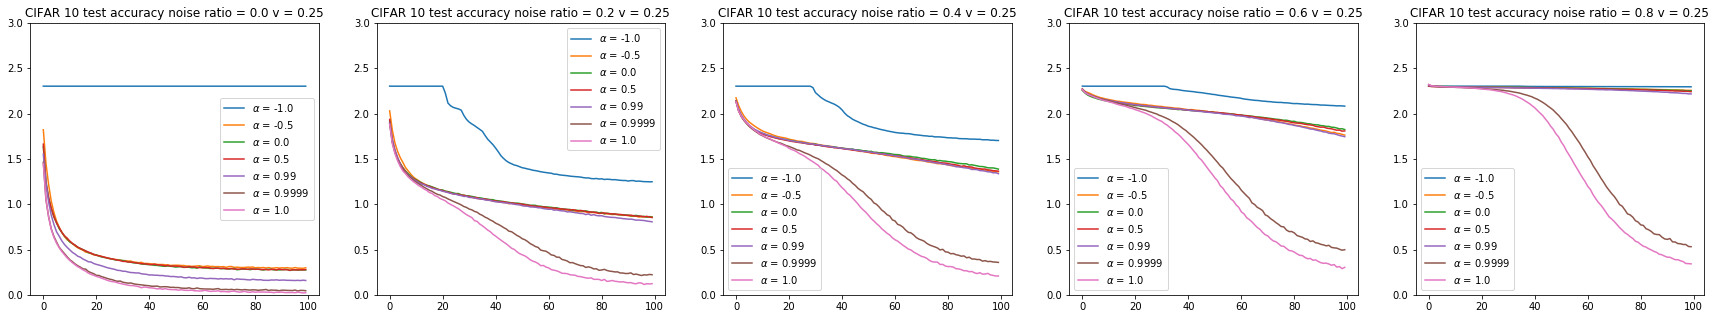

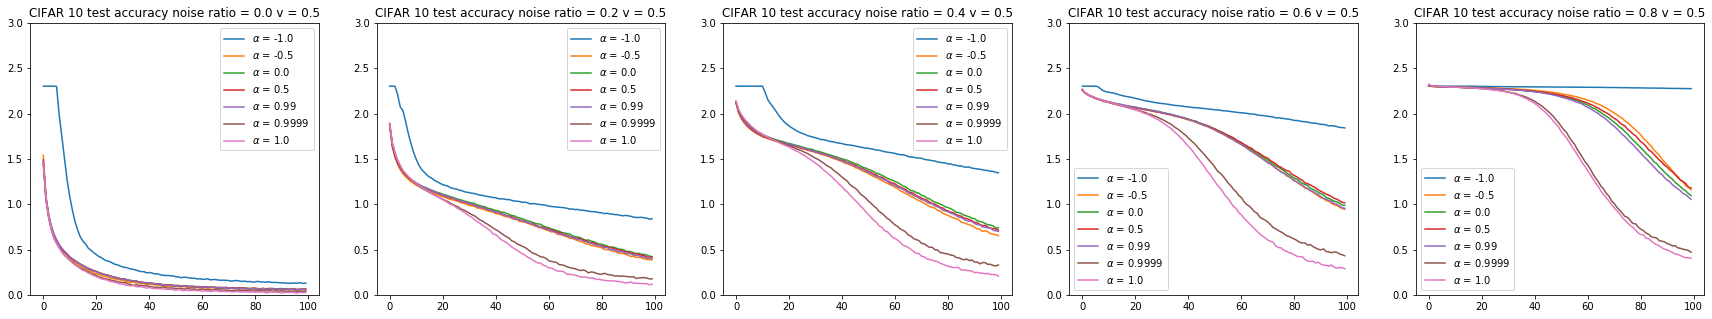

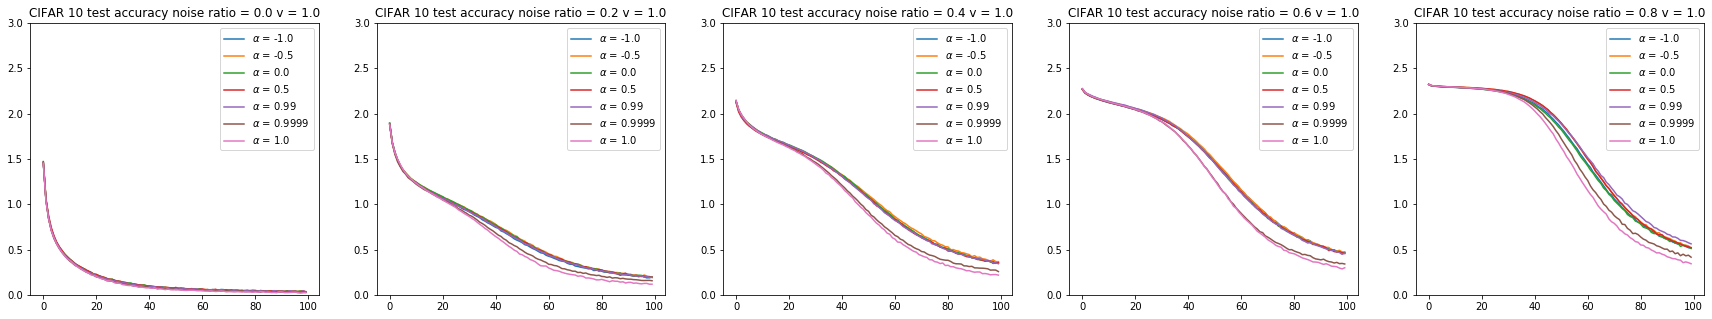

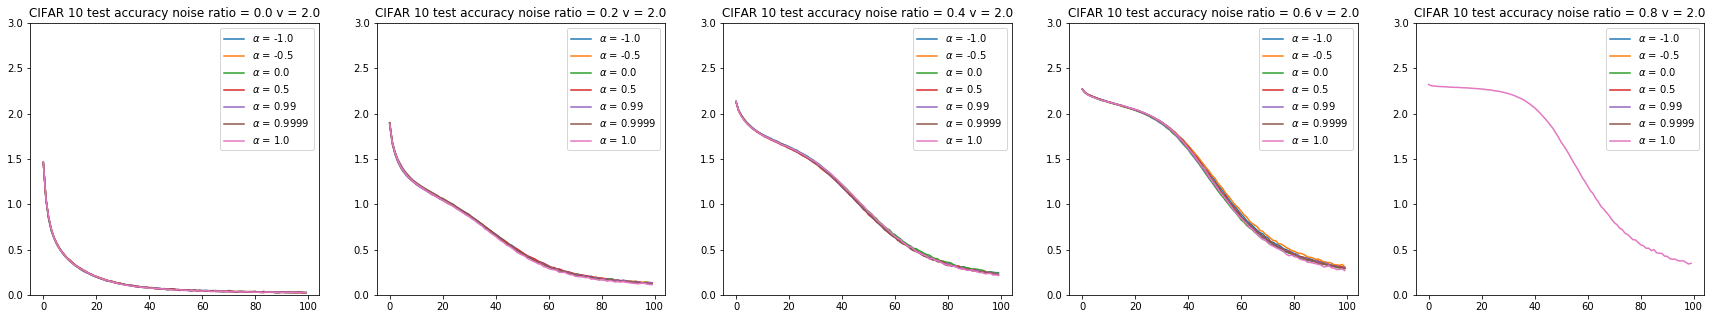

In [9]:
nr_list = sorted(list(sdf_cifar10['noise_ratio'].unique()))
v_list = sorted(list(sdf_cifar10['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_cifar10, col_of_interests=['train_loss'], key_var='alpha', key_var_name=r'$\alpha$', case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('CIFAR 10 test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([0, 3])
    fig.show()

# MNIST

In [10]:
case_dict_mnist = extract_log("MNIST", "DNN", "forpub")

In [11]:
sdf_mnist = get_stats_df(case_dict_mnist)
sdf_mnist

key dataset model task_id cuda      lr    v  \
0    MNISTforpubDNN2001142327341fd4   MNIST   DNN  forpub    2  0.0001  1.0   
1    MNISTforpubDNN200115033831bd83   MNIST   DNN  forpub    2  0.0001  1.0   
2    MNISTforpubDNN200115081928d052   MNIST   DNN  forpub    3  0.0001  2.0   
3    MNISTforpubDNN2001150023559de7   MNIST   DNN  forpub    2  0.0001  1.0   
4    MNISTforpubDNN200115063534601f   MNIST   DNN  forpub    4  0.0001  4.0   
..                              ...     ...   ...     ...  ...     ...  ...   
170  MNISTforpubDNN2001150825376bdf   MNIST   DNN  forpub    1  0.0001  0.5   
171  MNISTforpubDNN200115000755e9f8   MNIST   DNN  forpub    4  0.0001  4.0   
172  MNISTforpubDNN200114213405a6ad   MNIST   DNN  forpub    2  0.0001  1.0   
173  MNISTforpubDNN200115012435a133   MNIST   DNN  forpub    1  0.0001  0.5   
174  MNISTforpubDNN2001150121024f0e   MNIST   DNN  forpub    3  0.0001  2.0   

      alpha  auto weight_decay batch_size num_epochs  noise_ratio  
0   -1.0000  True            0        128        100          0.0  
1    0.9999  True            0        128        100          0.4  
2    0.0000  True            0        128        100          0.6  
3    0.9999  True            0        128        100          0.2  
4   -0.5000  True            0        128        100          0.6  
..      ...   ...          ...        ...        ...          ...  
170  0.0000  True            0        128        100          0.6  
171  0.9900  True            0        128        100          0.2  
172  0.9900  True            0        128        100          0.0  
173  0.5000  True            0        128        100          0.2  
174  0.5000  True            0        128        100          0.2  

[175 rows x 13 columns]

[-1.0, -0.5, 0.0, 0.5, 0.99, 0.9999, 1.0]


/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


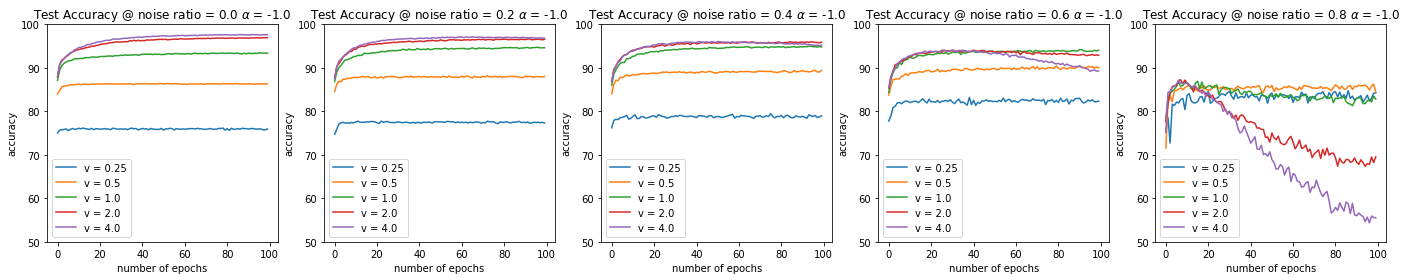

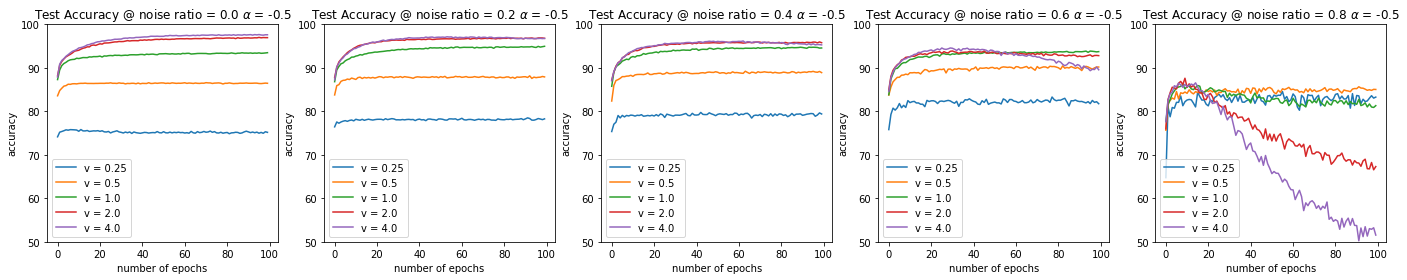

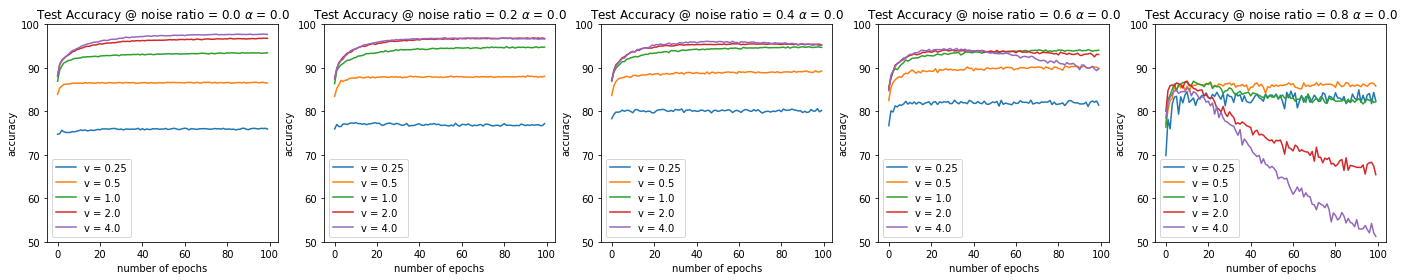

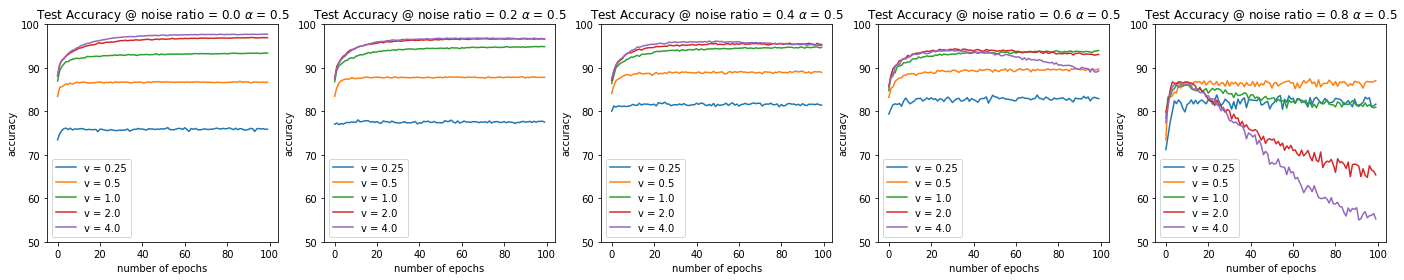

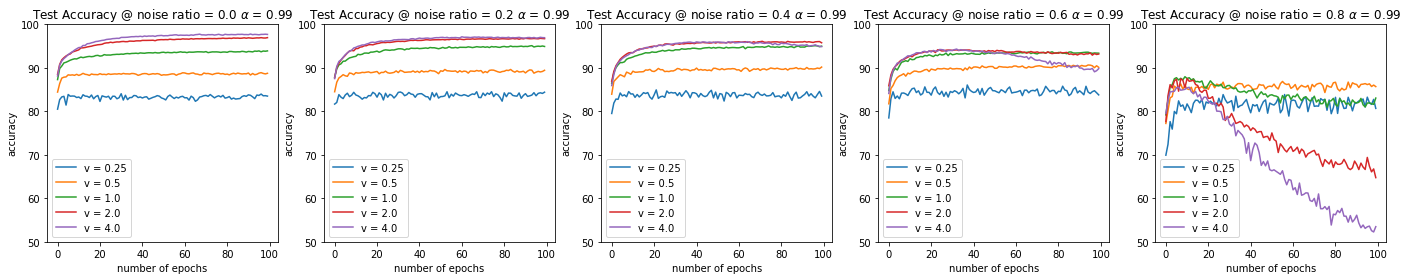

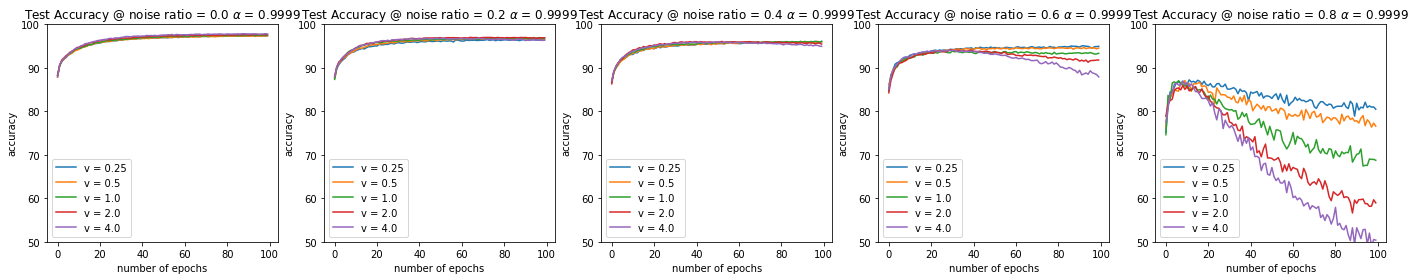

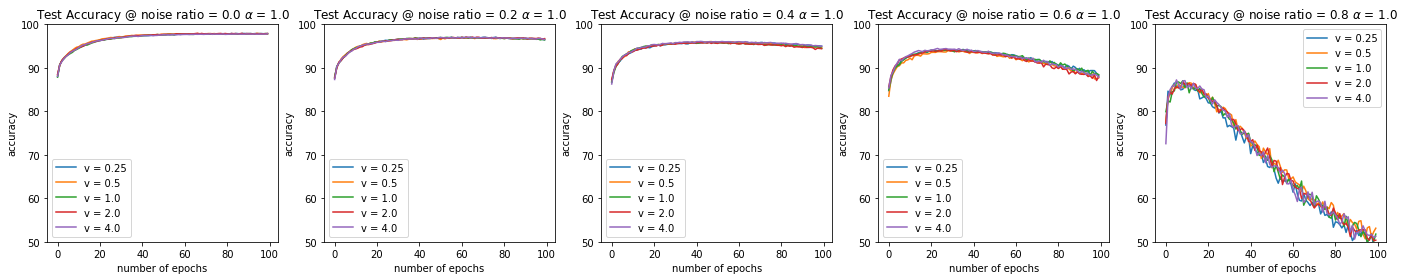

In [12]:
nr_list = sorted(list(sdf_mnist['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_mnist['alpha'].unique()))
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist,
                         col_of_interests=['test_acc'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'Test Accuracy @ noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()

[-1.0, -0.5, 0.0, 0.5, 0.99, 0.9999, 1.0]


/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


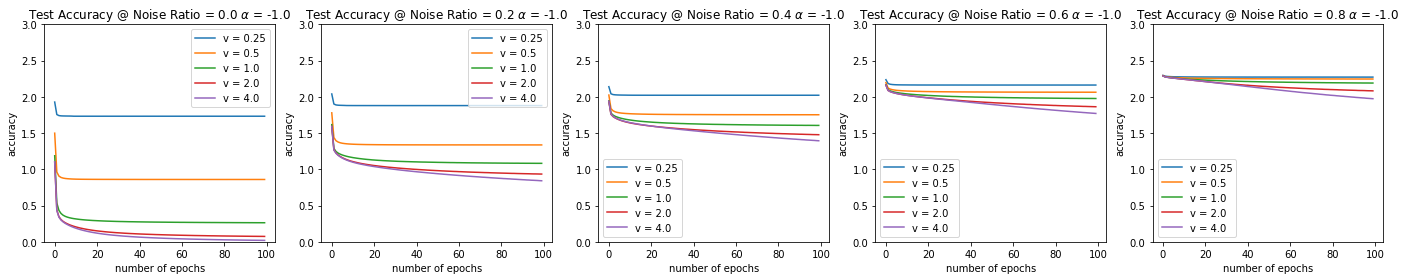

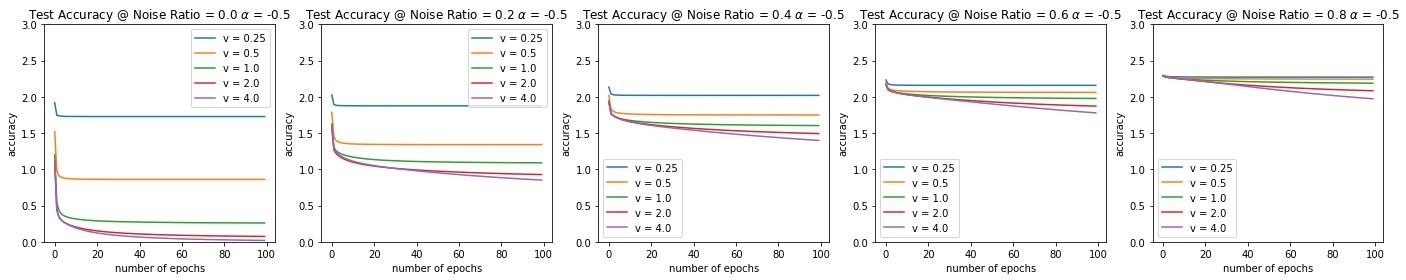

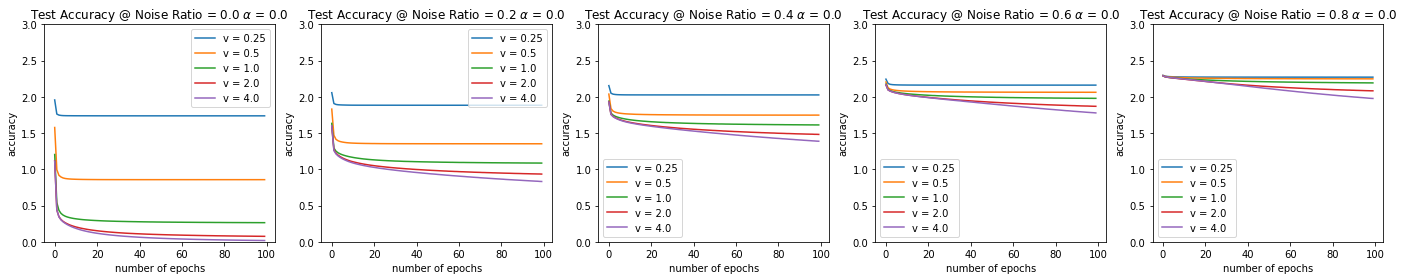

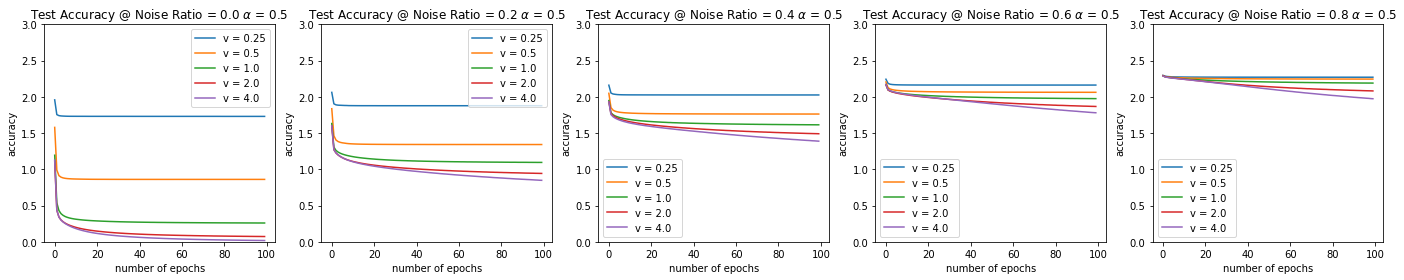

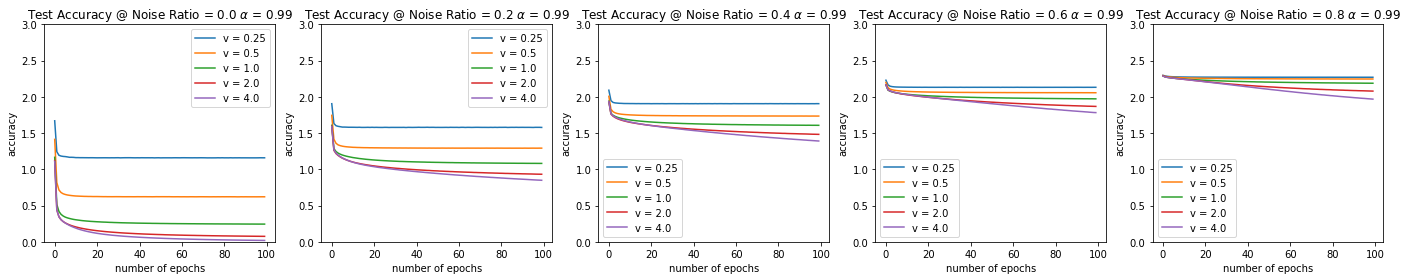

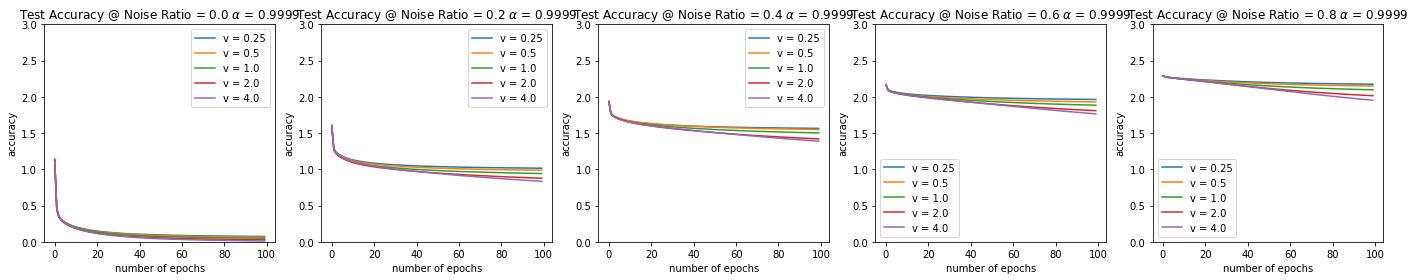

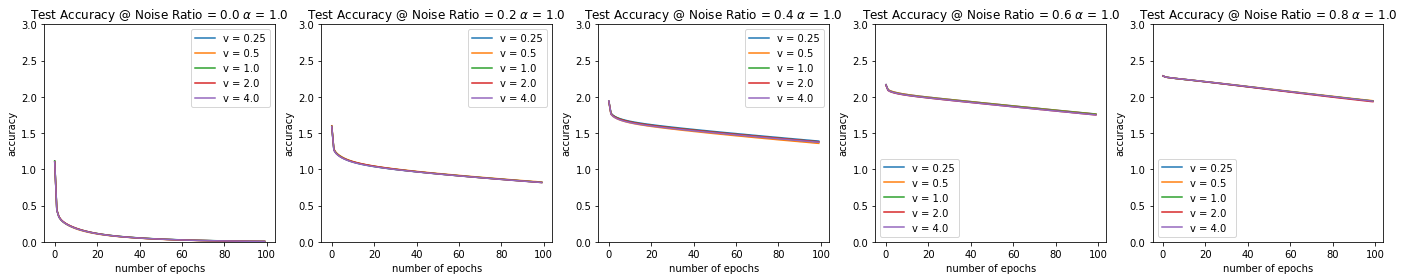

In [16]:
nr_list = sorted(list(sdf_mnist['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_mnist['alpha'].unique()))
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist,
                         col_of_interests=['train_loss'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'Test Accuracy @ Noise Ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([0, 3])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


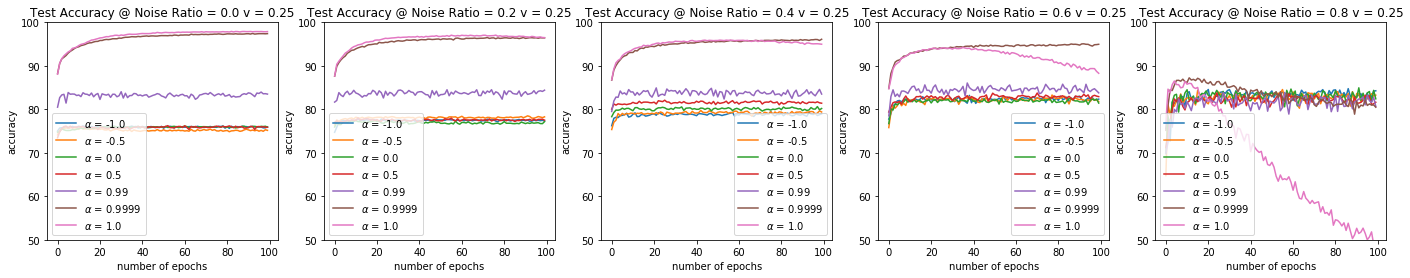

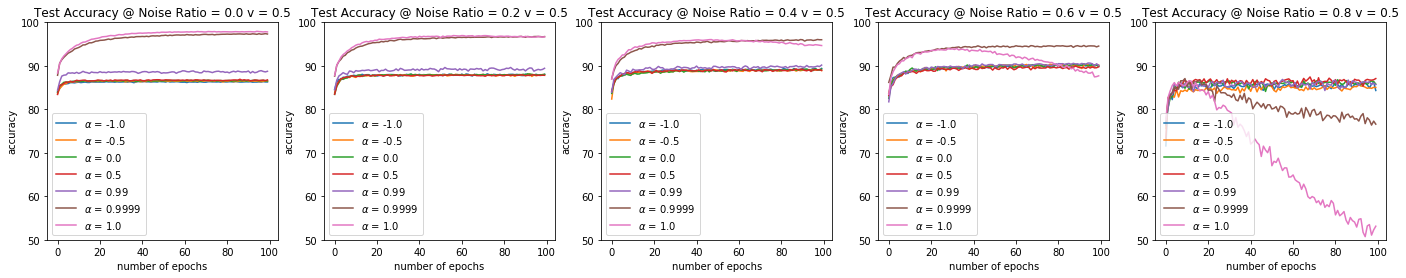

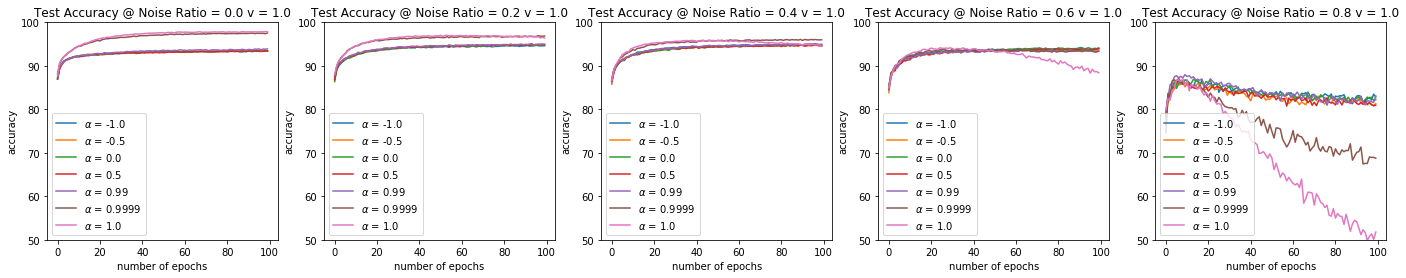

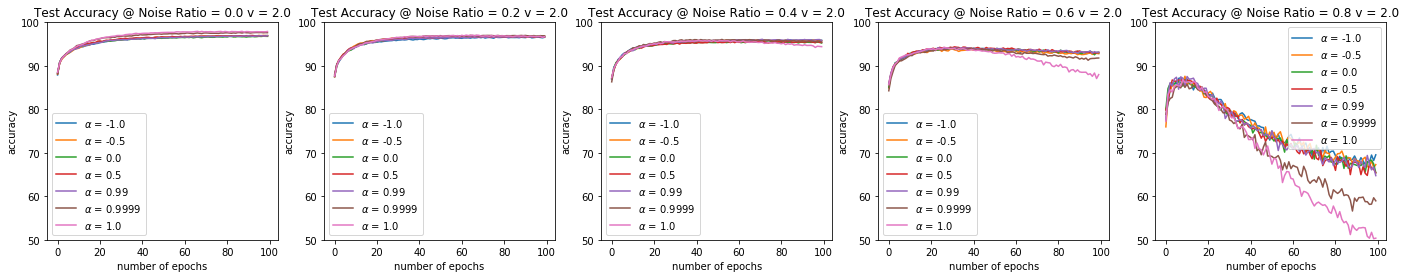

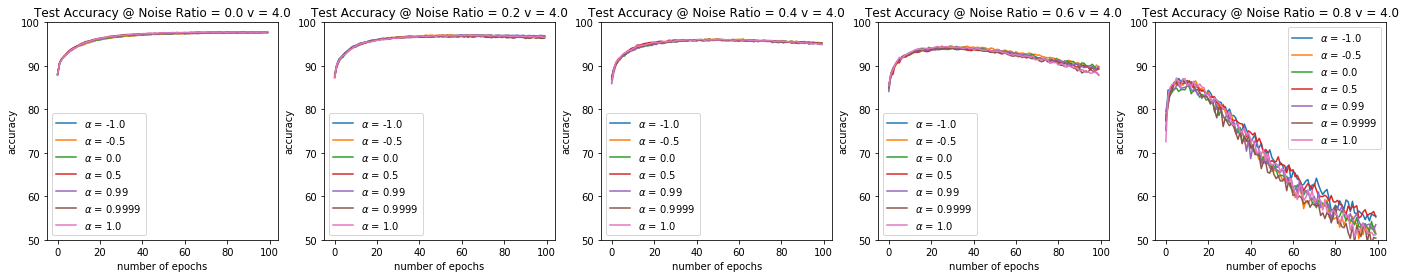

In [18]:
nr_list = sorted(list(sdf_mnist['noise_ratio'].unique()))
v_list = sorted(list(sdf_mnist['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(24, 4))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_mnist,
                         col_of_interests=['test_acc'], 
                         key_var='alpha',
                         key_var_name=r'$\alpha$',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('Test Accuracy @ Noise Ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()

# IMDB

In [19]:
case_dict_imdb = extract_log("IMDB", "LSTMATT", "forpub")

In [20]:
sdf_imdb = get_stats_df(case_dict_imdb)
sdf_imdb

key dataset    model task_id cuda      lr  \
0    IMDBforpubLSTMATT200115063301dbab    IMDB  LSTMATT  forpub    2  0.0001   
1    IMDBforpubLSTMATT20011420485551ab    IMDB  LSTMATT  forpub    3  0.0001   
2    IMDBforpubLSTMATT200115102914a378    IMDB  LSTMATT  forpub    3  0.0001   
3    IMDBforpubLSTMATT200115140517b1fc    IMDB  LSTMATT  forpub    1  0.0001   
4    IMDBforpubLSTMATT200115080130777d    IMDB  LSTMATT  forpub    2  0.0001   
..                                 ...     ...      ...     ...  ...     ...   
170  IMDBforpubLSTMATT2001150256585c2d    IMDB  LSTMATT  forpub    4  0.0001   
171  IMDBforpubLSTMATT2001150506034691    IMDB  LSTMATT  forpub    2  0.0001   
172  IMDBforpubLSTMATT200115085825049b    IMDB  LSTMATT  forpub    2  0.0001   
173  IMDBforpubLSTMATT200115131825cdbe    IMDB  LSTMATT  forpub    2  0.0001   
174  IMDBforpubLSTMATT200115052855ccfc    IMDB  LSTMATT  forpub    4  0.0001   

       v   alpha  auto weight_decay batch_size num_epochs  noise_ratio  
0    1.0 -0.5000  True            0        128        100          0.2  
1    2.0  1.0000  True          NaN        128        100          0.0  
2    2.0  1.0000  True            0        128        100          0.4  
3    0.5  0.0000  True            0        128        100          0.4  
4    1.0  0.9999  True            0        128        100          0.3  
..   ...     ...   ...          ...        ...        ...          ...  
170  4.0  0.5000  True            0        128        100          0.2  
171  1.0  0.9900  True            0        128        100          0.2  
172  1.0  0.5000  True            0        128        100          0.3  
173  1.0 -0.5000  True            0        128        100          0.4  
174  4.0  0.5000  True            0        128        100          0.3  

[175 rows x 13 columns]

[-1.0, -0.5, 0.0, 0.5, 0.99, 0.9999, 1.0]


/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


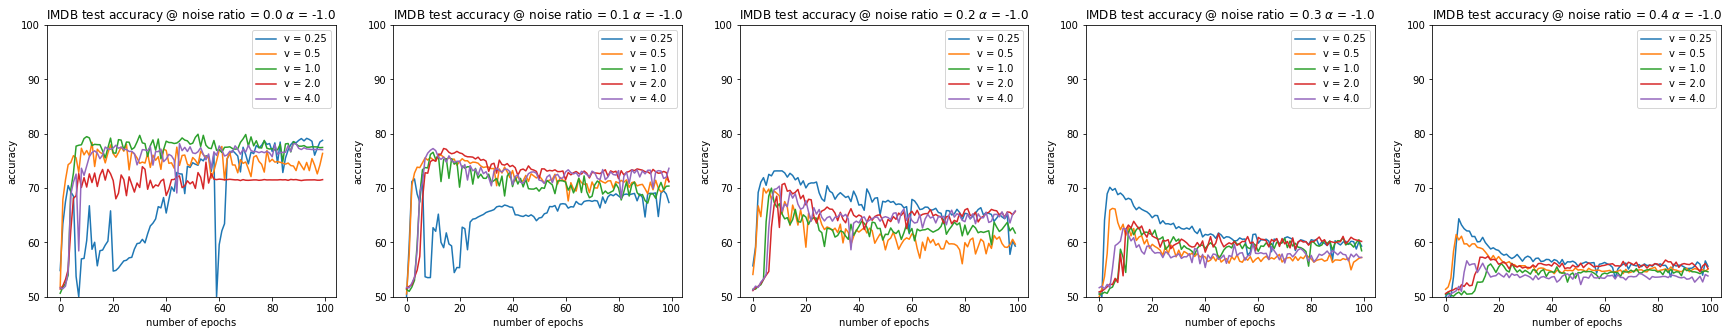

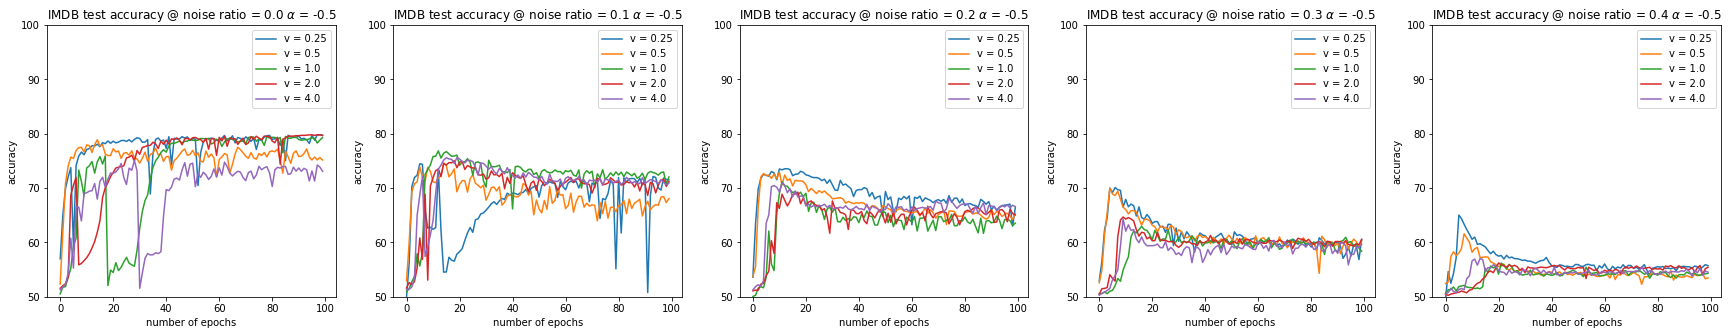

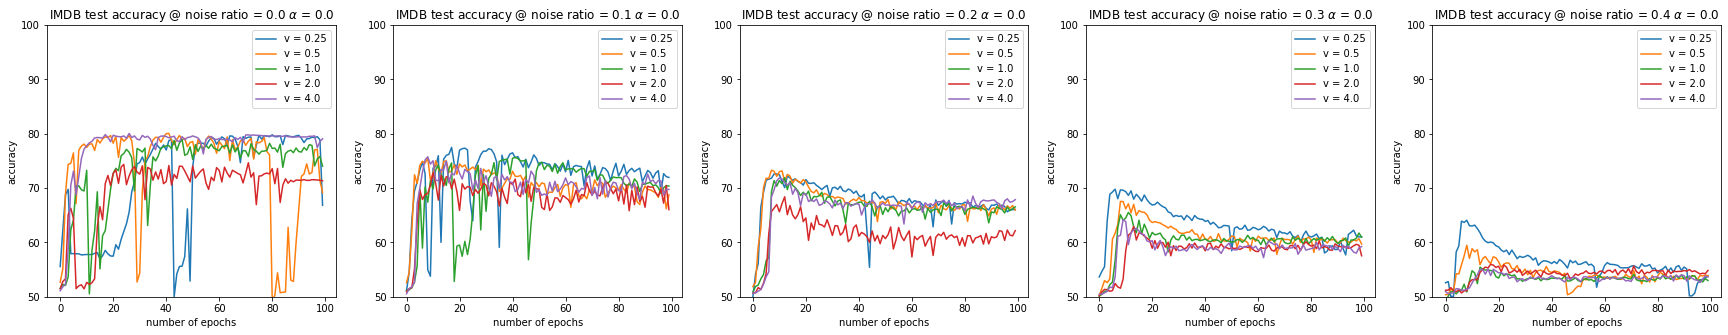

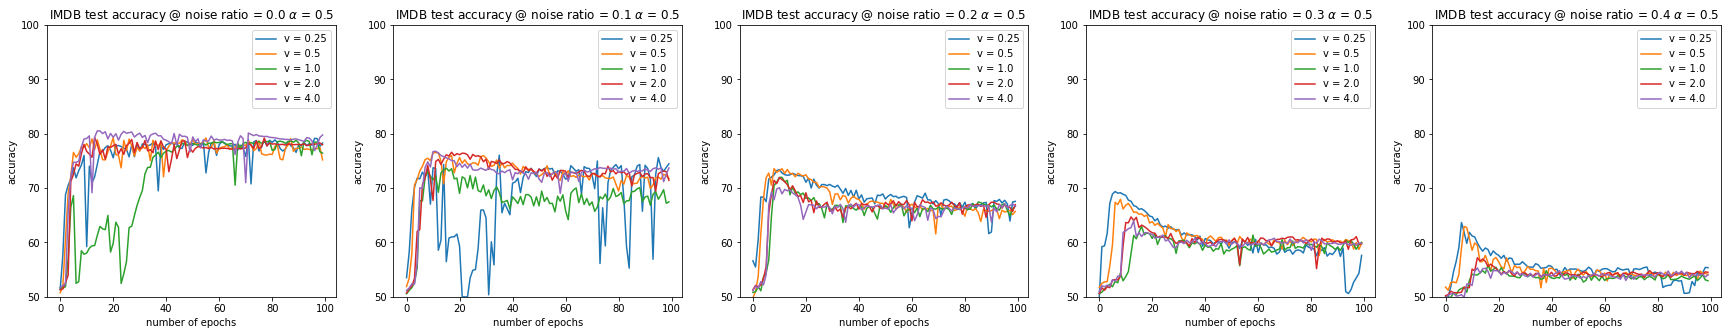

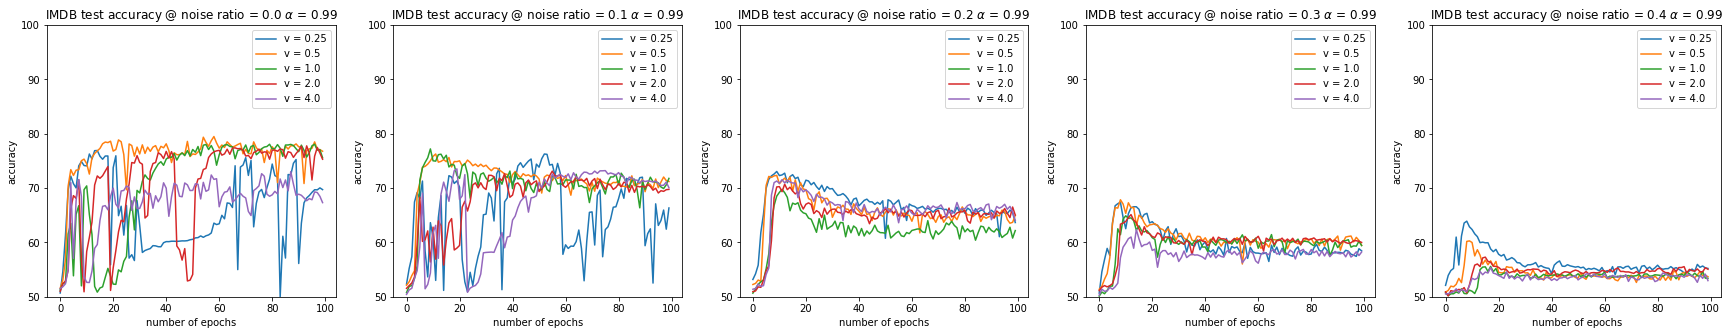

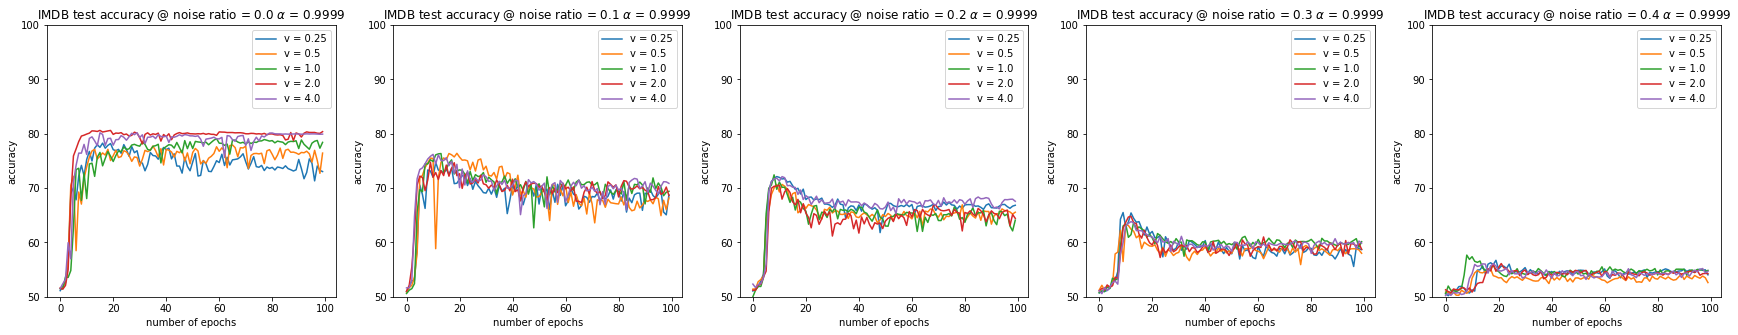

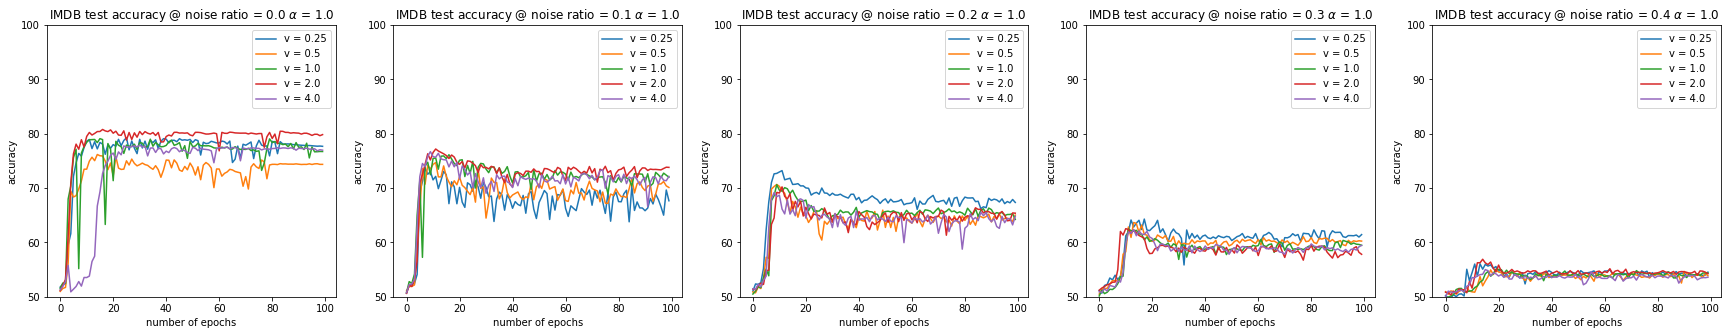

In [21]:
nr_list = sorted(list(sdf_imdb['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_imdb['alpha'].unique()))
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5),)
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_imdb,
                         col_of_interests=['test_acc'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'IMDB test accuracy @ noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()

[-1.0, -0.5, 0.0, 0.5, 0.99, 0.9999, 1.0]


/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


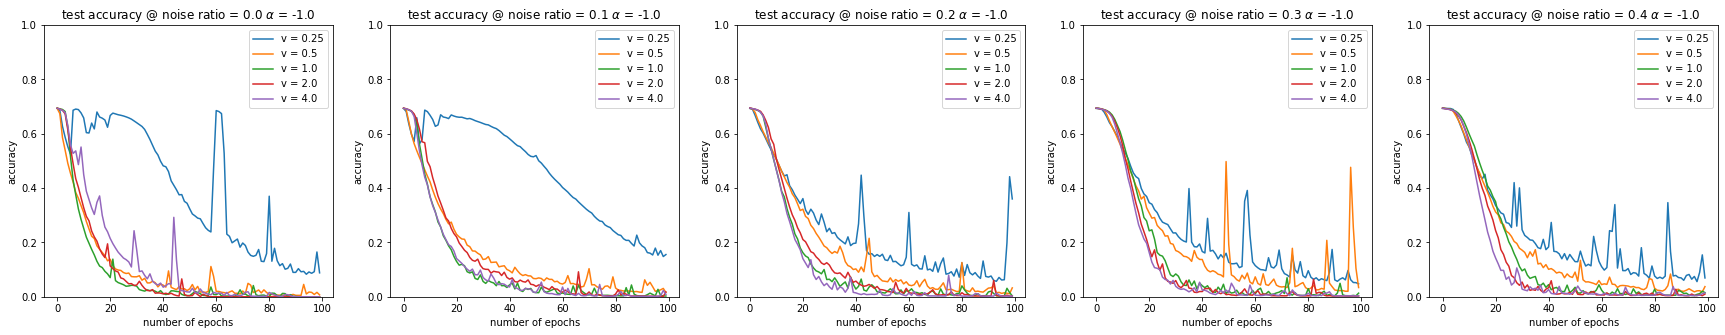

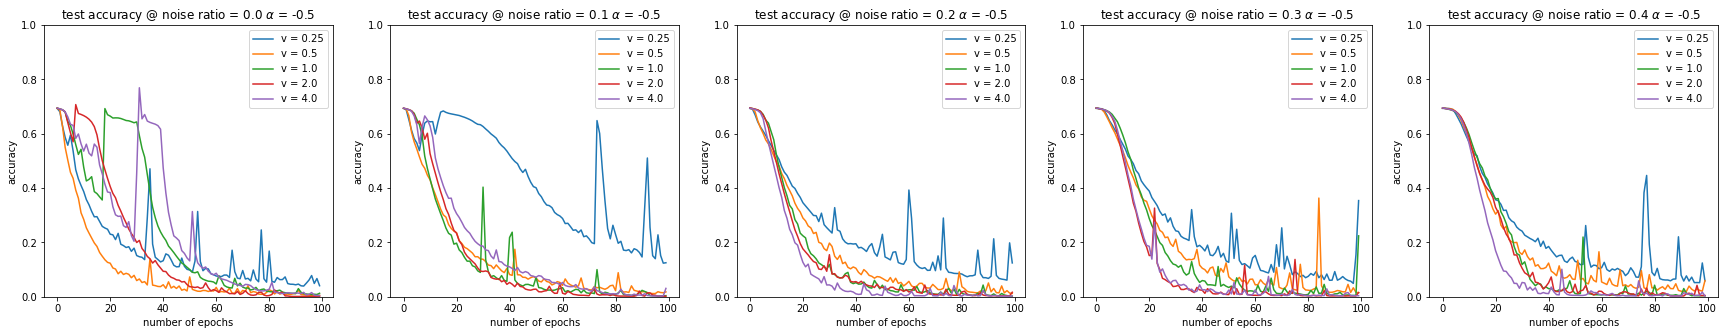

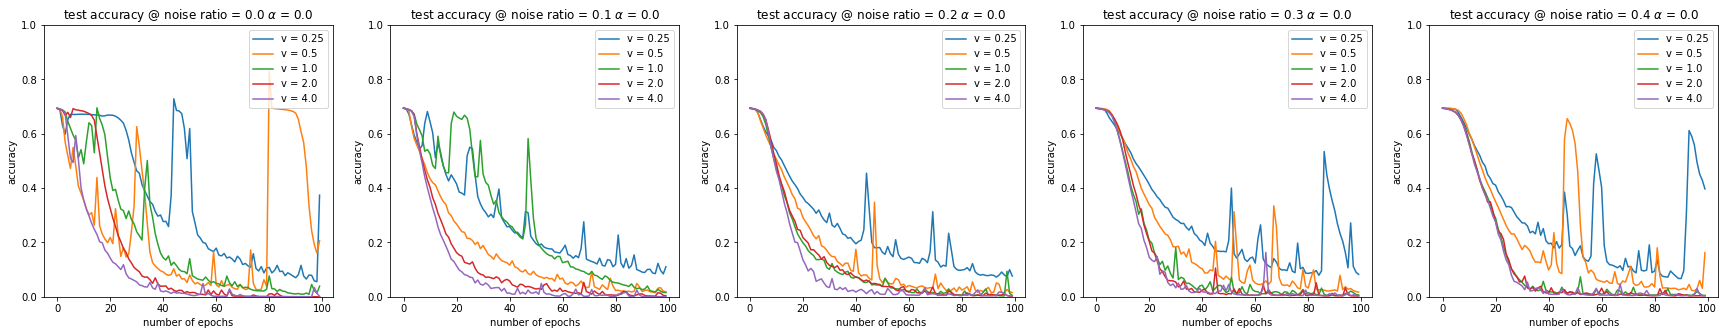

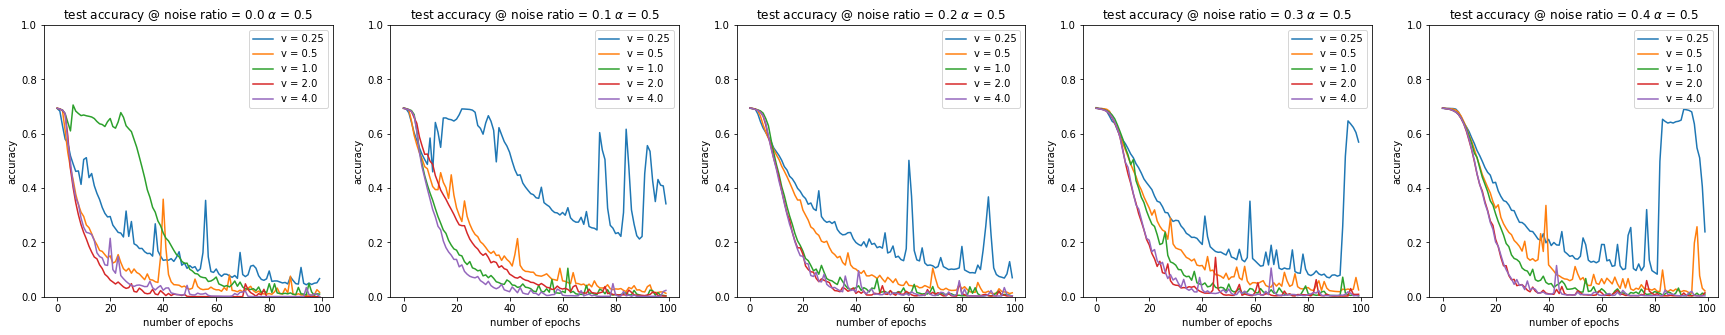

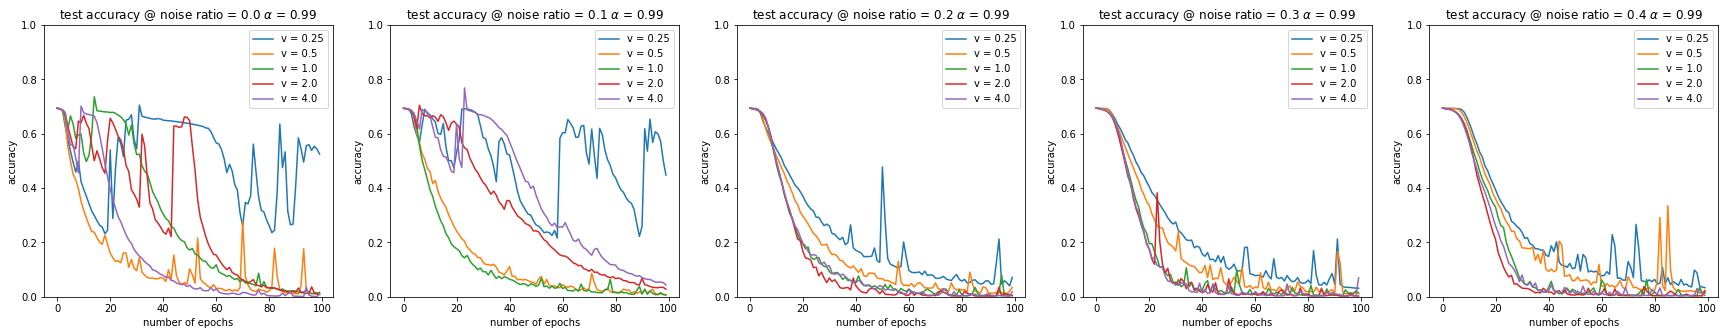

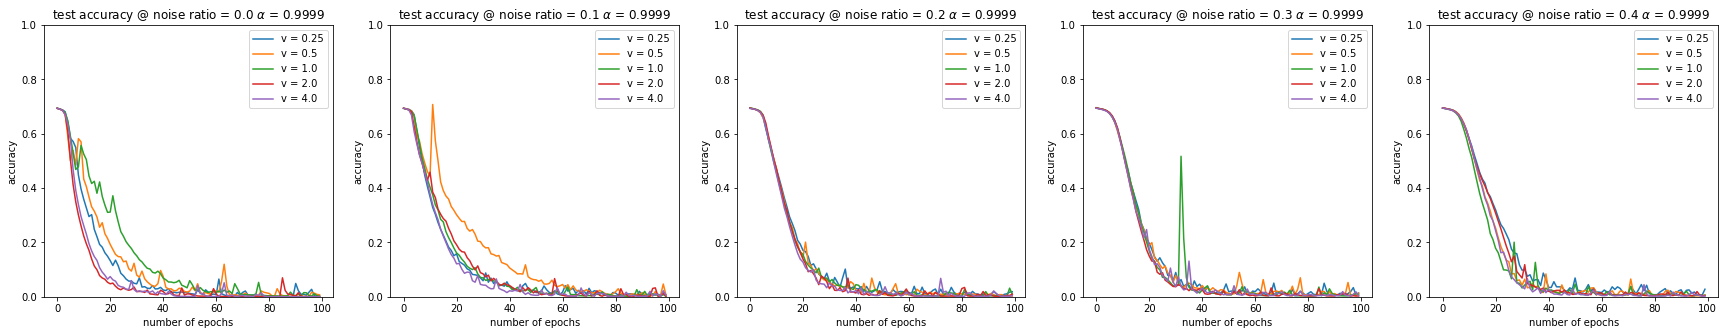

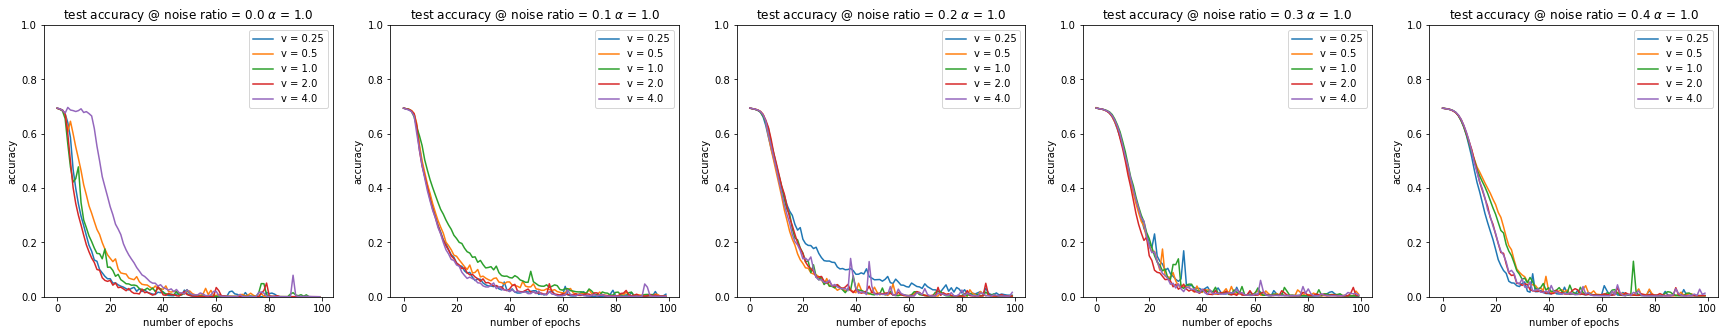

In [22]:
nr_list = sorted(list(sdf_imdb['noise_ratio'].unique()))
alpha_list = sorted(list(sdf_imdb['alpha'].unique()))
print(alpha_list)
for alpha in alpha_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_imdb,
                         col_of_interests=['train_loss'],
                         key_var='v',
                         key_var_name='v',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['alpha'] == alpha), ax=ax[i])
        ax[i].set_title(r'test accuracy @ noise ratio = {} $\alpha$ = {}'.format(nr, alpha))
        ax[i].set_ylim([0, 1])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()

/Users/zihao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


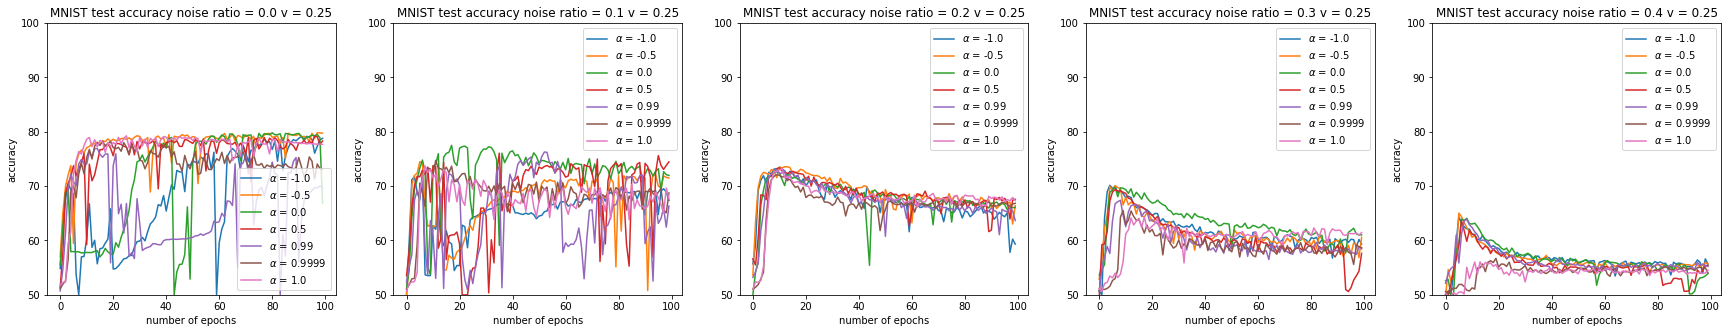

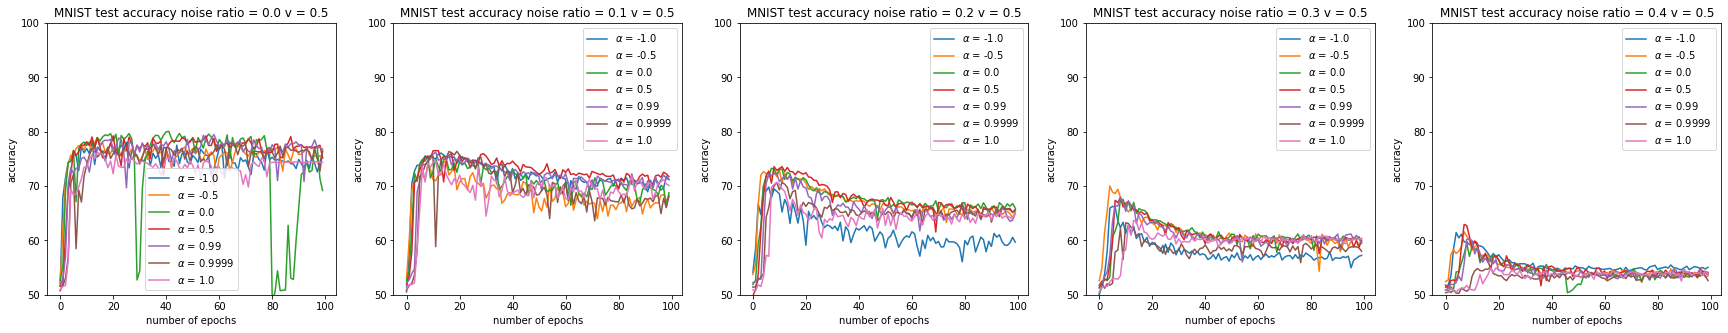

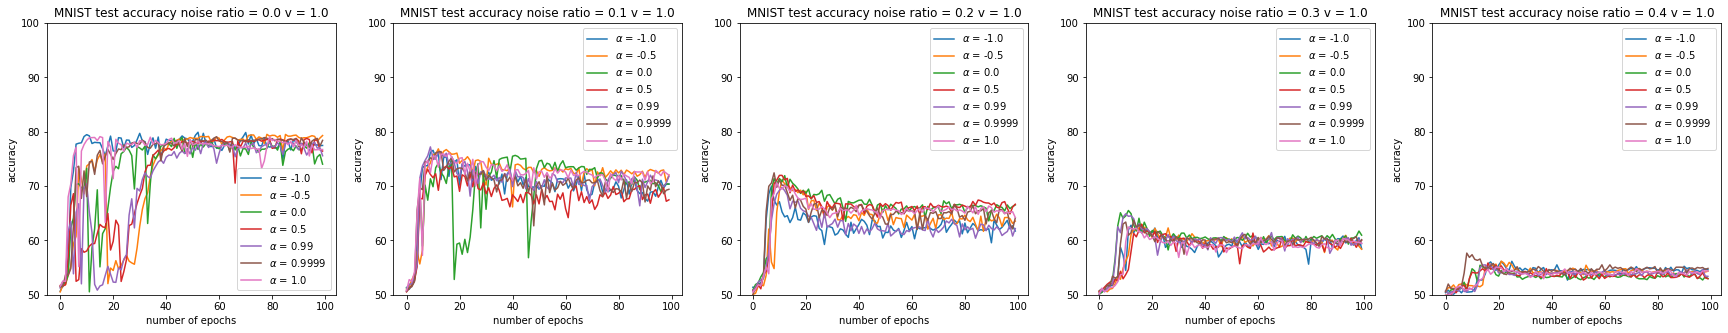

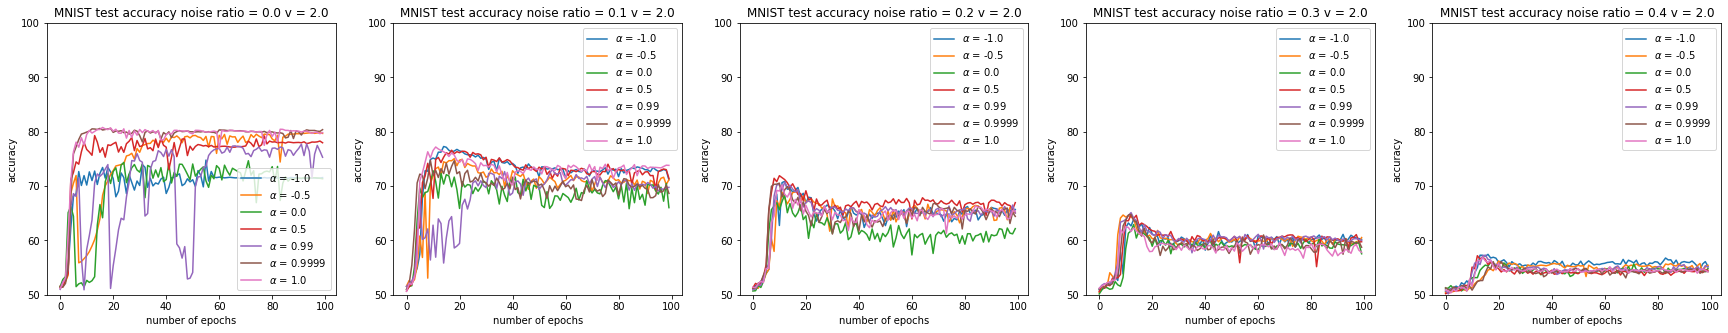

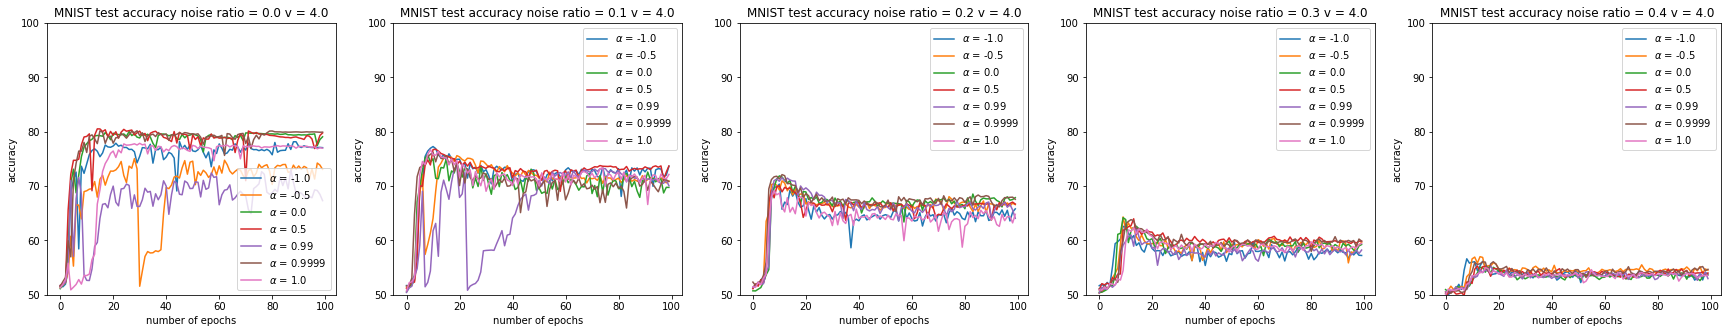

In [23]:
nr_list = sorted(list(sdf_imdb['noise_ratio'].unique()))
v_list = sorted(list(sdf_imdb['v'].unique()))
for v in v_list:
    fig, ax = plt.subplots(1, len(nr_list), figsize=(30, 5))
    for i, nr in enumerate(nr_list):
        plot_along_epoch(case_dict_imdb,
                         col_of_interests=['test_acc'], 
                         key_var='alpha',
                         key_var_name=r'$\alpha$',
                         key_var_filter=lambda x: x>=-1 and x<=8,
                         case_meta_filter=lambda x: (x['noise_ratio'] == nr and x['v'] == v), ax=ax[i])
        ax[i].set_title('MNIST test accuracy noise ratio = {} v = {}'.format(nr, v))
        ax[i].set_ylim([50, 100])
        ax[i].set_xlabel('number of epochs')
        ax[i].set_ylabel('accuracy')
    fig.show()